In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
# Cargar el dataset sin encabezado
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Calcular estadísticas básicas
stats = data.describe().T
print(stats)

      count           mean            std      min       25%       50%  \
0   48842.0      38.643585      13.710510     17.0      28.0      37.0   
2   48842.0  189664.134597  105604.025423  12285.0  117550.5  178144.5   
4   48842.0      10.078089       2.570973      1.0       9.0      10.0   
10  48842.0    1079.067626    7452.019058      0.0       0.0       0.0   
11  48842.0      87.502314     403.004552      0.0       0.0       0.0   
12  48842.0      40.422382      12.391444      1.0      40.0      40.0   

         75%        max  
0       48.0       90.0  
2   237642.0  1490400.0  
4       12.0       16.0  
10       0.0    99999.0  
11       0.0     4356.0  
12      45.0       99.0  


In [8]:
import pandas as pd

# Cargar el dataset sin encabezado
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path, header=None)

# Verificar las primeras filas
print(data.head())

# Definir los nombres de las columnas
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
data.columns = column_names

# Verificar los primeros registros para asegurar que el encabezado se ha agregado correctamente
print(data.head())

   0                 1       2          3   4                   5   \
0  39         State-gov   77516  Bachelors  13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
2  38           Private  215646    HS-grad   9            Divorced   
3  53           Private  234721       11th   7  Married-civ-spouse   
4  28           Private  338409  Bachelors  13  Married-civ-spouse   

                  6              7      8       9     10  11  12  \
0       Adm-clerical  Not-in-family  White    Male  2174   0  40   
1    Exec-managerial        Husband  White    Male     0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male     0   0  40   
3  Handlers-cleaners        Husband  Black    Male     0   0  40   
4     Prof-specialty           Wife  Black  Female     0   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K  
   age        

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertir columnas categóricas a variables dummy
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns)

# Verificar los primeros registros para asegurar que las columnas categóricas se han convertido correctamente
print(data.head())

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0        False                  False                False   
1        False                  False                False   
2        False                  False                False   
3        False                  False                False   
4        False                  False                False   

   workclass_Never-worked  ...  native-country_Scotland  native-country_South  \
0                   False  ...                    False                 False   
1 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separar las características (X) y la etiqueta (y)
X = data.drop(['income_<=50K', 'income_>50K'], axis=1)
y = data['income_>50K']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

Regresión Logística:
              precision    recall  f1-score   support

       False       0.87      0.94      0.90      7414
        True       0.74      0.57      0.64      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

[[6939  475]
 [1009 1346]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import pandas as pd

# Definir los datos de entrada
input_data = {
    'age': [39],
    'workclass': ['State-gov'],
    'fnlwgt': [77516],
    'education': ['Bachelors'],
    'education-num': [13],
    'marital-status': ['Never-married'],
    'occupation': ['Adm-clerical'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Male'],
    'capital-gain': [2174],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
}

# Convertir a DataFrame
input_df = pd.DataFrame(input_data)

# Aplicar One-Hot Encoding a las variables categóricas
input_df = pd.get_dummies(input_df)

# Asegurar que las columnas del input_df coincidan con las del X_train
missing_cols = set(X_train.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0
input_df = input_df[X_train.columns]

# Predicción con Regresión Logística
pred_log_reg = log_reg.predict(input_df)
print(f"Predicción de Regresión Logística: {'>50K' if pred_log_reg[0] else '<=50K'}")

Predicción de Regresión Logística: <=50K


C:\Users\Usuario\AppData\Local\Temp\ipykernel_30440\1861394889.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30440\1861394889.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30440\1861394889.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

In [15]:
import pandas as pd

# Definir los datos de entrada
input_data_2 = {
    'age': [31],
    'workclass': ['Private'],
    'fnlwgt': [45781],
    'education': ['Masters'],
    'education-num': [14],
    'marital-status': ['Never-married'],
    'occupation': ['Prof-specialty'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Female'],
    'capital-gain': [14084],
    'capital-loss': [0],
    'hours-per-week': [50],
    'native-country': ['United-States']
}

# Convertir a DataFrame
input_df_2 = pd.DataFrame(input_data_2)

# Aplicar One-Hot Encoding a las variables categóricas
input_df_2 = pd.get_dummies(input_df_2)

# Asegurar que las columnas del input_df coincidan con las del X_train
missing_cols = set(X_train.columns) - set(input_df_2.columns)
for col in missing_cols:
    input_df_2[col] = 0
input_df_2 = input_df_2[X_train.columns]

# Predicción con Regresión Logística
pred_log_reg_2 = log_reg.predict(input_df_2)
print(f"Predicción de Regresión Logística: {'>50K' if pred_log_reg_2[0] else '<=50K'}")

Predicción de Regresión Logística: >50K


C:\Users\Usuario\AppData\Local\Temp\ipykernel_30440\1958102587.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df_2[col] = 0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30440\1958102587.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df_2[col] = 0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30440\1958102587.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

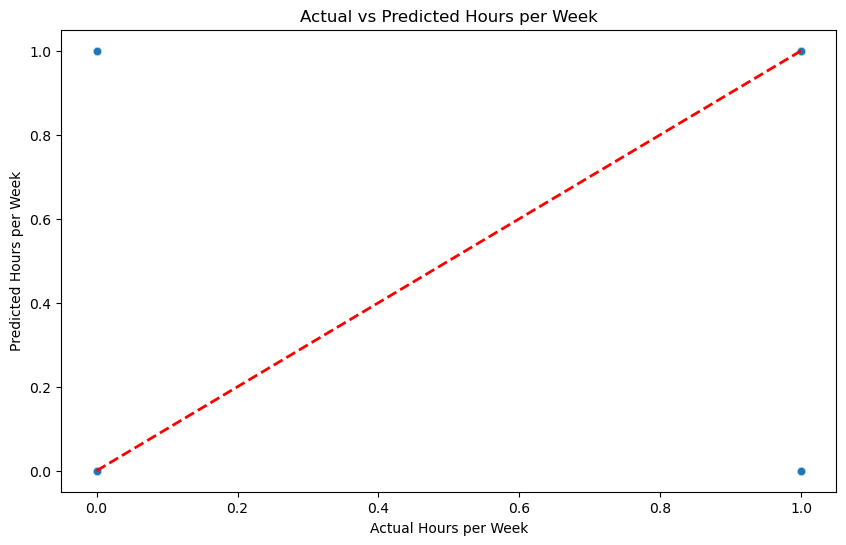

In [20]:
import seaborn as sns

# Predecir en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Hours per Week')
plt.ylabel('Predicted Hours per Week')
plt.title('Actual vs Predicted Hours per Week')
plt.show()